In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.7/871.7 kB 20.7 MB/s eta 0:00:00


In [2]:
# download dataset from gdrive
!gdown 1JGaS7kbeer8QqEeiSP3UcgE0npJzPTFK -O hagrid.zip


Downloading...
From (original): https://drive.google.com/uc?id=1JGaS7kbeer8QqEeiSP3UcgE0npJzPTFK
From (redirected): https://drive.google.com/uc?id=1JGaS7kbeer8QqEeiSP3UcgE0npJzPTFK&confirm=t&uuid=bd28c66b-a598-4cf6-ad66-d876b9ece7b7
To: /content/hagrid.zip
100% 1.90G/1.90G [00:33<00:00, 57.3MB/s]


In [3]:
import os
import zipfile
zip_file_path = os.path.join('.', 'hagrid.zip')
dataset_dir = "hagrid"
# extract downloaded zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_dir)

os.remove(zip_file_path)

In [4]:
%rm -rf hagrid/__MACOSX/

In [5]:
hagrid_micro_dir = os.path.join(dataset_dir, 'HG_micro_3class')
%cat {hagrid_micro_dir}/data.yaml

train: hagrid/HG_micro_3class/train/images
val: hagrid/HG_micro_3class/valid/images
test: hagrid/HG_micro_3class/test/images

nc: 3
names: [fist,palm,no_gesture]


In [6]:
!mkdir /content/datasets
!cp -r /content/hagrid/HG_micro_3class /content/datasets/hagrid

In [7]:
import yaml

with open('/content/datasets/hagrid/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

data['train'] = './train/images'
data['val'] = './valid/images'
data['test'] = './test/images'

with open('/content/datasets/hagrid/data.yaml', 'w') as file:
    yaml.dump(data, file)



In [2]:
from ultralytics import YOLO
import pandas as pd
import matplotlib.pyplot as plt

model = YOLO("yolov8n.pt")

hyperparam_combinations = [
    {'lr0': 0.01, 'momentum': 0.9, 'weight_decay': 0.0005, 'warmup_epochs': 3.0},
    {'lr0': 0.001, 'momentum': 0.95, 'weight_decay': 0.0001, 'warmup_epochs': 5.0},
    {'lr0': 0.0001, 'momentum': 0.9, 'weight_decay': 0.0005, 'warmup_epochs': 2.0},
]

data = "/content/datasets/hagrid/data.yaml"

for i, params in enumerate(hyperparam_combinations):
    print(f"Training with combination {i+1}: {params}")
    results = model.train(
        data=data,
        epochs=10,
        batch=-1,   # Auto adjust
        **params
    )


Training with combination 1: {'lr0': 0.01, 'momentum': 0.9, 'weight_decay': 0.0005, 'warmup_epochs': 3.0}
Ultralytics YOLOv8.2.88 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/hagrid/data.yaml, epochs=10, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=

train: Scanning /content/datasets/hagrid/train/labels.cache... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/hagrid/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.9' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005625000000000001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      9.08G      1.354      4.792      1.245         74        640: 100%|██████████| 14/14 [00:48<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        200        309     0.0041      0.407      0.144      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      9.03G     0.8448      2.441     0.9382         80        640: 100%|██████████| 14/14 [00:29<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.38s/it]


                   all        200        309    0.00294      0.594      0.348      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      9.03G     0.7806      1.715      0.908         82        640: 100%|██████████| 14/14 [00:30<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.05s/it]


                   all        200        309          1     0.0714      0.417      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      9.03G     0.7737      1.475     0.9014         78        640: 100%|██████████| 14/14 [00:32<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all        200        309          1     0.0146      0.561      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      9.03G     0.7581      1.318     0.9036         82        640: 100%|██████████| 14/14 [00:32<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

                   all        200        309          1     0.0521      0.629      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      9.03G     0.7407      1.209     0.8968         74        640: 100%|██████████| 14/14 [00:32<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all        200        309      0.977      0.519      0.847      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      9.03G     0.7156      1.103     0.8937         79        640: 100%|██████████| 14/14 [00:32<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]

                   all        200        309      0.994      0.635      0.886      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      9.03G     0.7036      1.001     0.8901         76        640: 100%|██████████| 14/14 [00:35<00:00,  2.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.36s/it]


                   all        200        309      0.962      0.851      0.946      0.724

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      9.03G     0.6877     0.9357     0.8845         75        640: 100%|██████████| 14/14 [00:30<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.00s/it]


                   all        200        309       0.97      0.909       0.96      0.748

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      9.03G     0.6417     0.8502      0.868         77        640: 100%|██████████| 14/14 [00:29<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.99s/it]

                   all        200        309      0.971      0.932      0.973      0.751



10 epochs completed in 0.114 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.88 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]


                   all        200        309      0.971      0.932      0.973      0.752
                  fist        100        100      0.995       0.99      0.995      0.769
                  palm        100        100      0.991       0.98      0.993      0.854
            no_gesture        109        109      0.928      0.827       0.93      0.634
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/train3
Training with combination 2: {'lr0': 0.001, 'momentum': 0.95, 'weight_decay': 0.0001, 'warmup_epochs': 5.0}
Ultralytics YOLOv8.2.88 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/hagrid/data.yaml, epochs=10, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train32, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, determinist

train: Scanning /content/datasets/hagrid/train/labels.cache... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/hagrid/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]


Plotting labels to runs/detect/train32/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.95' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000128125), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train32
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      10.3G     0.6221     0.8203     0.8641         18        640: 100%|██████████| 13/13 [00:47<00:00,  3.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.28s/it]


                   all        200        309       0.96       0.95      0.976      0.754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      10.3G     0.6558     0.8264     0.8757         19        640: 100%|██████████| 13/13 [00:26<00:00,  2.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.69s/it]


                   all        200        309      0.963      0.948      0.982      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      10.3G     0.6705     0.8154     0.8771         23        640: 100%|██████████| 13/13 [00:26<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.28s/it]

                   all        200        309      0.968      0.928      0.971      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      10.3G     0.6564     0.8169     0.8726         21        640: 100%|██████████| 13/13 [00:33<00:00,  2.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.29s/it]

                   all        200        309      0.951      0.937      0.974      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      10.3G     0.6553     0.7764     0.8674         21        640: 100%|██████████| 13/13 [00:30<00:00,  2.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]

                   all        200        309      0.955      0.928      0.953      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      10.3G     0.6573     0.7506     0.8677         19        640: 100%|██████████| 13/13 [00:29<00:00,  2.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all        200        309       0.95      0.909      0.938      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      10.3G     0.6605     0.7015      0.875         21        640: 100%|██████████| 13/13 [00:28<00:00,  2.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.93s/it]

                   all        200        309      0.919      0.928      0.954      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      10.3G     0.6421      0.663     0.8631         18        640: 100%|██████████| 13/13 [00:26<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.94s/it]

                   all        200        309      0.951      0.923      0.963      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      10.3G     0.6268     0.6296     0.8628         18        640: 100%|██████████| 13/13 [00:31<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]

                   all        200        309      0.965      0.918      0.957      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      10.3G      0.607     0.5841     0.8562         21        640: 100%|██████████| 13/13 [00:30<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]

                   all        200        309      0.972      0.945      0.973      0.769



10 epochs completed in 0.110 hours.
Optimizer stripped from runs/detect/train32/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train32/weights/best.pt, 6.2MB

Validating runs/detect/train32/weights/best.pt...
Ultralytics YOLOv8.2.88 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]


                   all        200        309      0.972      0.942      0.973      0.769
                  fist        100        100      0.977          1      0.994      0.787
                  palm        100        100      0.992       0.99      0.994      0.877
            no_gesture        109        109      0.948      0.835       0.93      0.643
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train32
Training with combination 3: {'lr0': 0.0001, 'momentum': 0.9, 'weight_decay': 0.0005, 'warmup_epochs': 2.0}
Ultralytics YOLOv8.2.88 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/hagrid/data.yaml, epochs=10, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train322, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, determini

train: Scanning /content/datasets/hagrid/train/labels.cache... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/hagrid/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]


Plotting labels to runs/detect/train322/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.9' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000609375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train322
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      10.1G     0.5837     0.5635     0.8468         75        640: 100%|██████████| 13/13 [00:56<00:00,  4.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

                   all        200        309      0.968      0.956      0.975      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      10.1G     0.6005     0.5558     0.8539         80        640: 100%|██████████| 13/13 [00:31<00:00,  2.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all        200        309      0.968      0.929      0.965      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      10.1G     0.5972     0.5626     0.8561         82        640: 100%|██████████| 13/13 [00:32<00:00,  2.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all        200        309      0.961      0.936      0.965      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      10.1G     0.6141     0.5544     0.8654         77        640: 100%|██████████| 13/13 [00:28<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.98s/it]

                   all        200        309      0.975      0.945      0.962      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      10.1G     0.6151     0.5528     0.8571         83        640: 100%|██████████| 13/13 [00:29<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all        200        309      0.967      0.916      0.961      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      10.1G     0.6281     0.5441     0.8598         73        640: 100%|██████████| 13/13 [00:30<00:00,  2.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]

                   all        200        309       0.94      0.935      0.959      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      10.1G     0.6146     0.5102     0.8648         79        640: 100%|██████████| 13/13 [00:31<00:00,  2.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all        200        309      0.958      0.898      0.954      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      10.1G     0.6039     0.4882     0.8509         74        640: 100%|██████████| 13/13 [00:32<00:00,  2.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.84s/it]

                   all        200        309      0.936       0.92      0.957       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      10.1G     0.5942     0.4666     0.8485         74        640: 100%|██████████| 13/13 [00:34<00:00,  2.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]

                   all        200        309      0.983      0.942      0.974      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      10.1G     0.5732     0.4408     0.8455         77        640: 100%|██████████| 13/13 [00:32<00:00,  2.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.29s/it]

                   all        200        309      0.971      0.939      0.976      0.772



10 epochs completed in 0.114 hours.
Optimizer stripped from runs/detect/train322/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train322/weights/best.pt, 6.2MB

Validating runs/detect/train322/weights/best.pt...
Ultralytics YOLOv8.2.88 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]


                   all        200        309      0.943      0.967      0.976      0.772
                  fist        100        100          1      0.999      0.995      0.792
                  palm        100        100       0.99      0.997      0.995      0.874
            no_gesture        109        109      0.838      0.903      0.939      0.648
Speed: 0.3ms preprocess, 2.4ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train322


In [21]:
df = pd.read_csv('/content/runs/detect/train3/results.csv')
df.tail(1)

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
9,10,0.64174,0.85021,0.86803,0.97132,0.93224,0.97265,0.75144,0.81398,0.66367,0.90744,0.000156,0.000156,0.000156


{'lr0': 0.01, 'momentum': 0.9, 'weight_decay': 0.0005, 'warmup_epochs': 3.0}


,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
9,10,0.64174,0.85021,0.86803,0.97132,0.93224,0.97265,0.75144,0.81398,0.66367,0.90744,0.000156,0.000156,0.000156


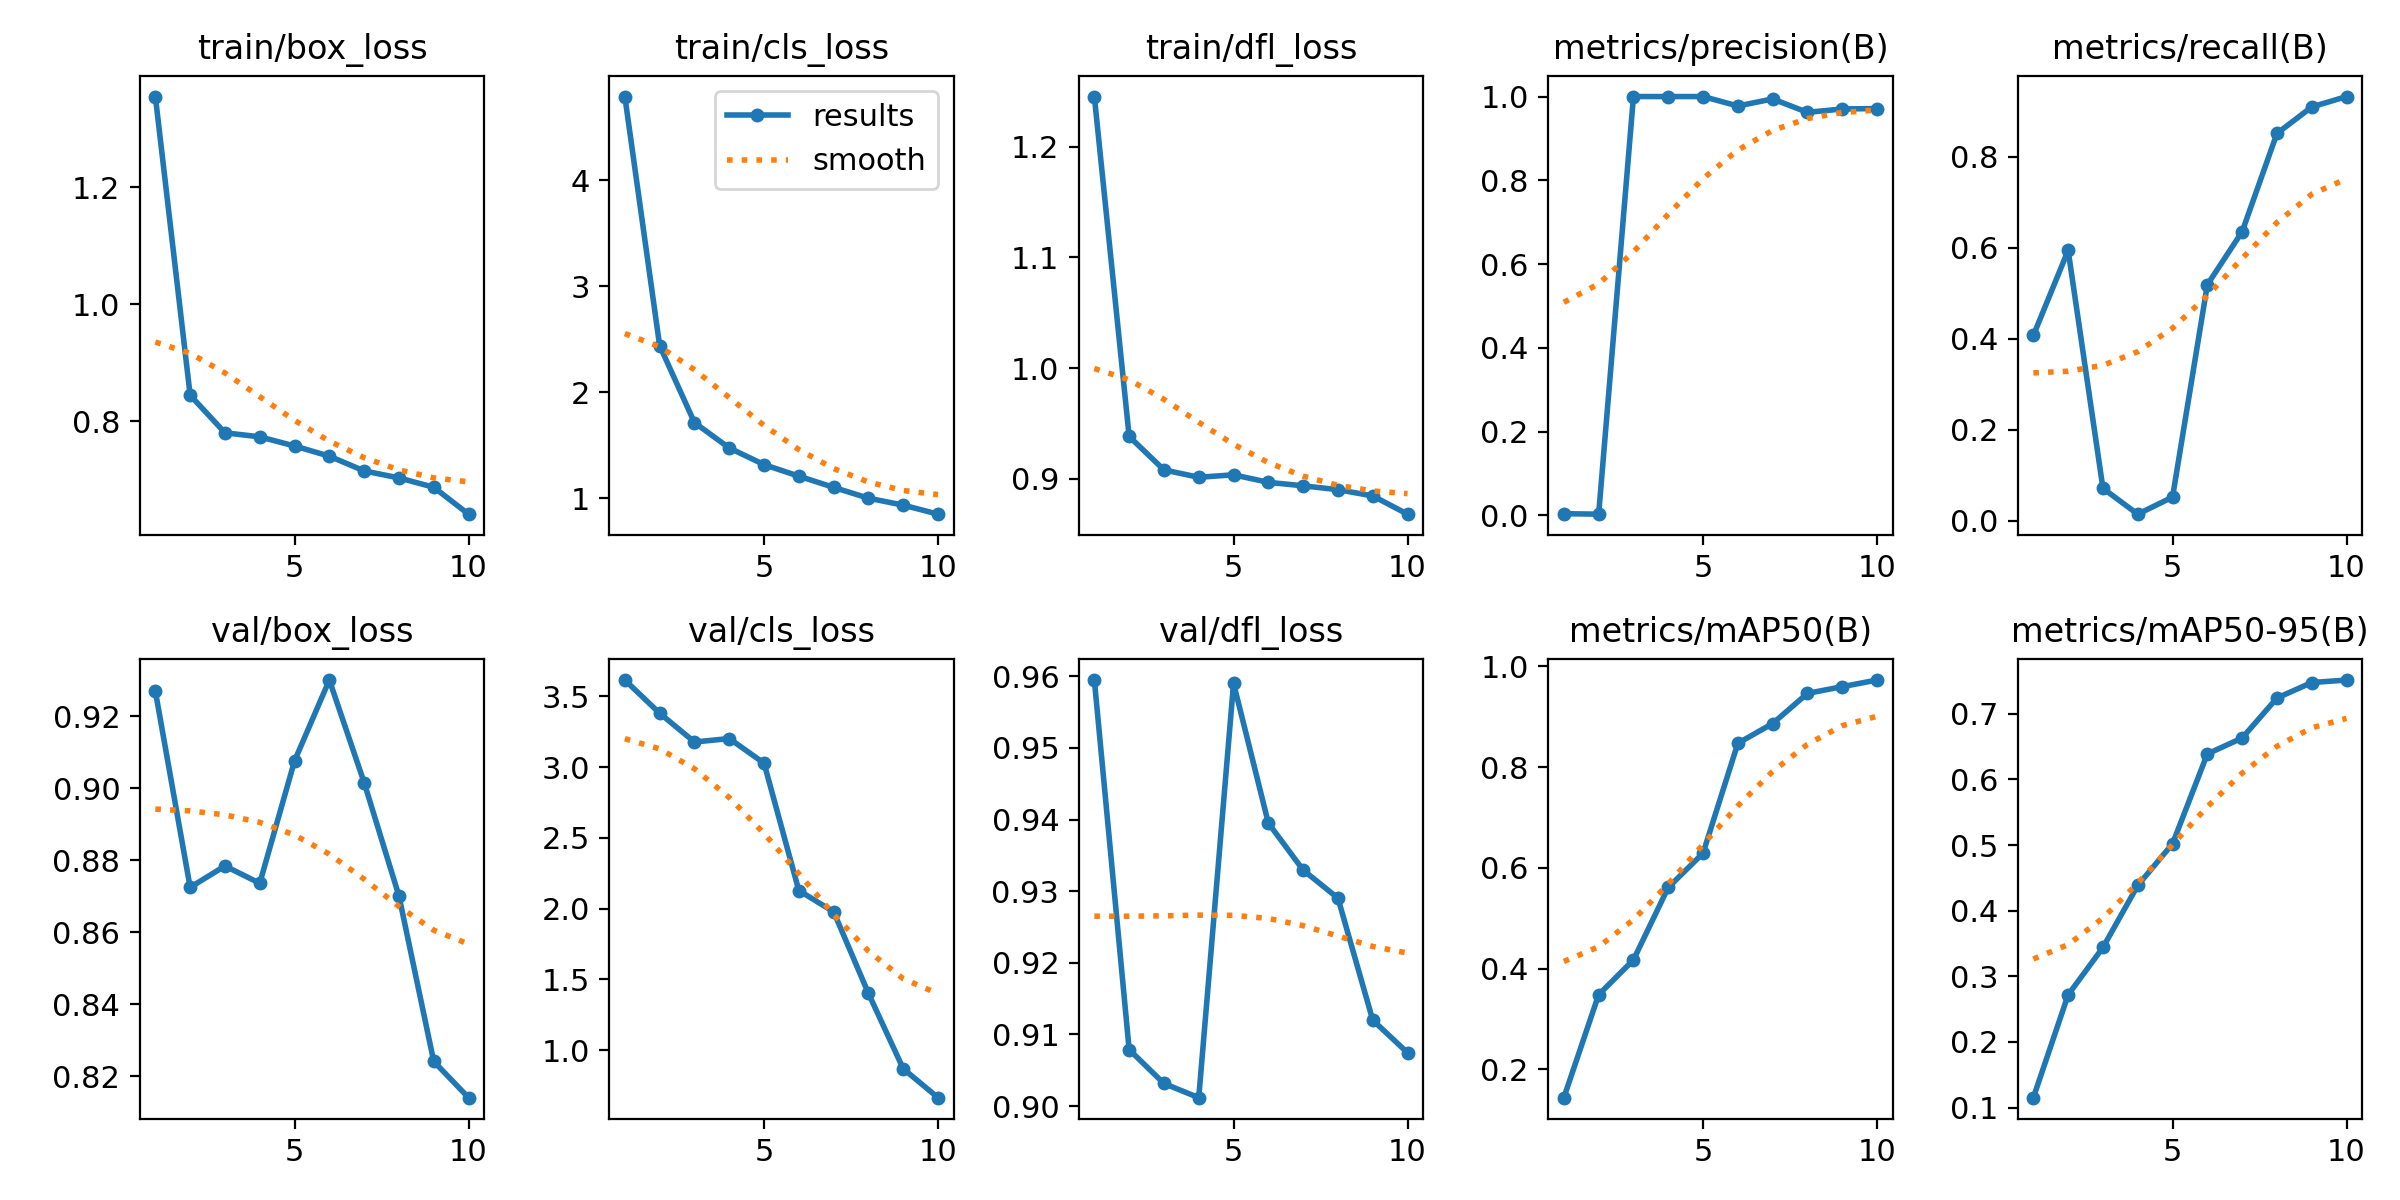

{'lr0': 0.001, 'momentum': 0.95, 'weight_decay': 0.0001, 'warmup_epochs': 5.0}


,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
9,10,0.60704,0.58406,0.8562,0.97179,0.94468,0.97285,0.76877,0.81215,0.46322,0.90825,0.000156,0.000156,0.000156


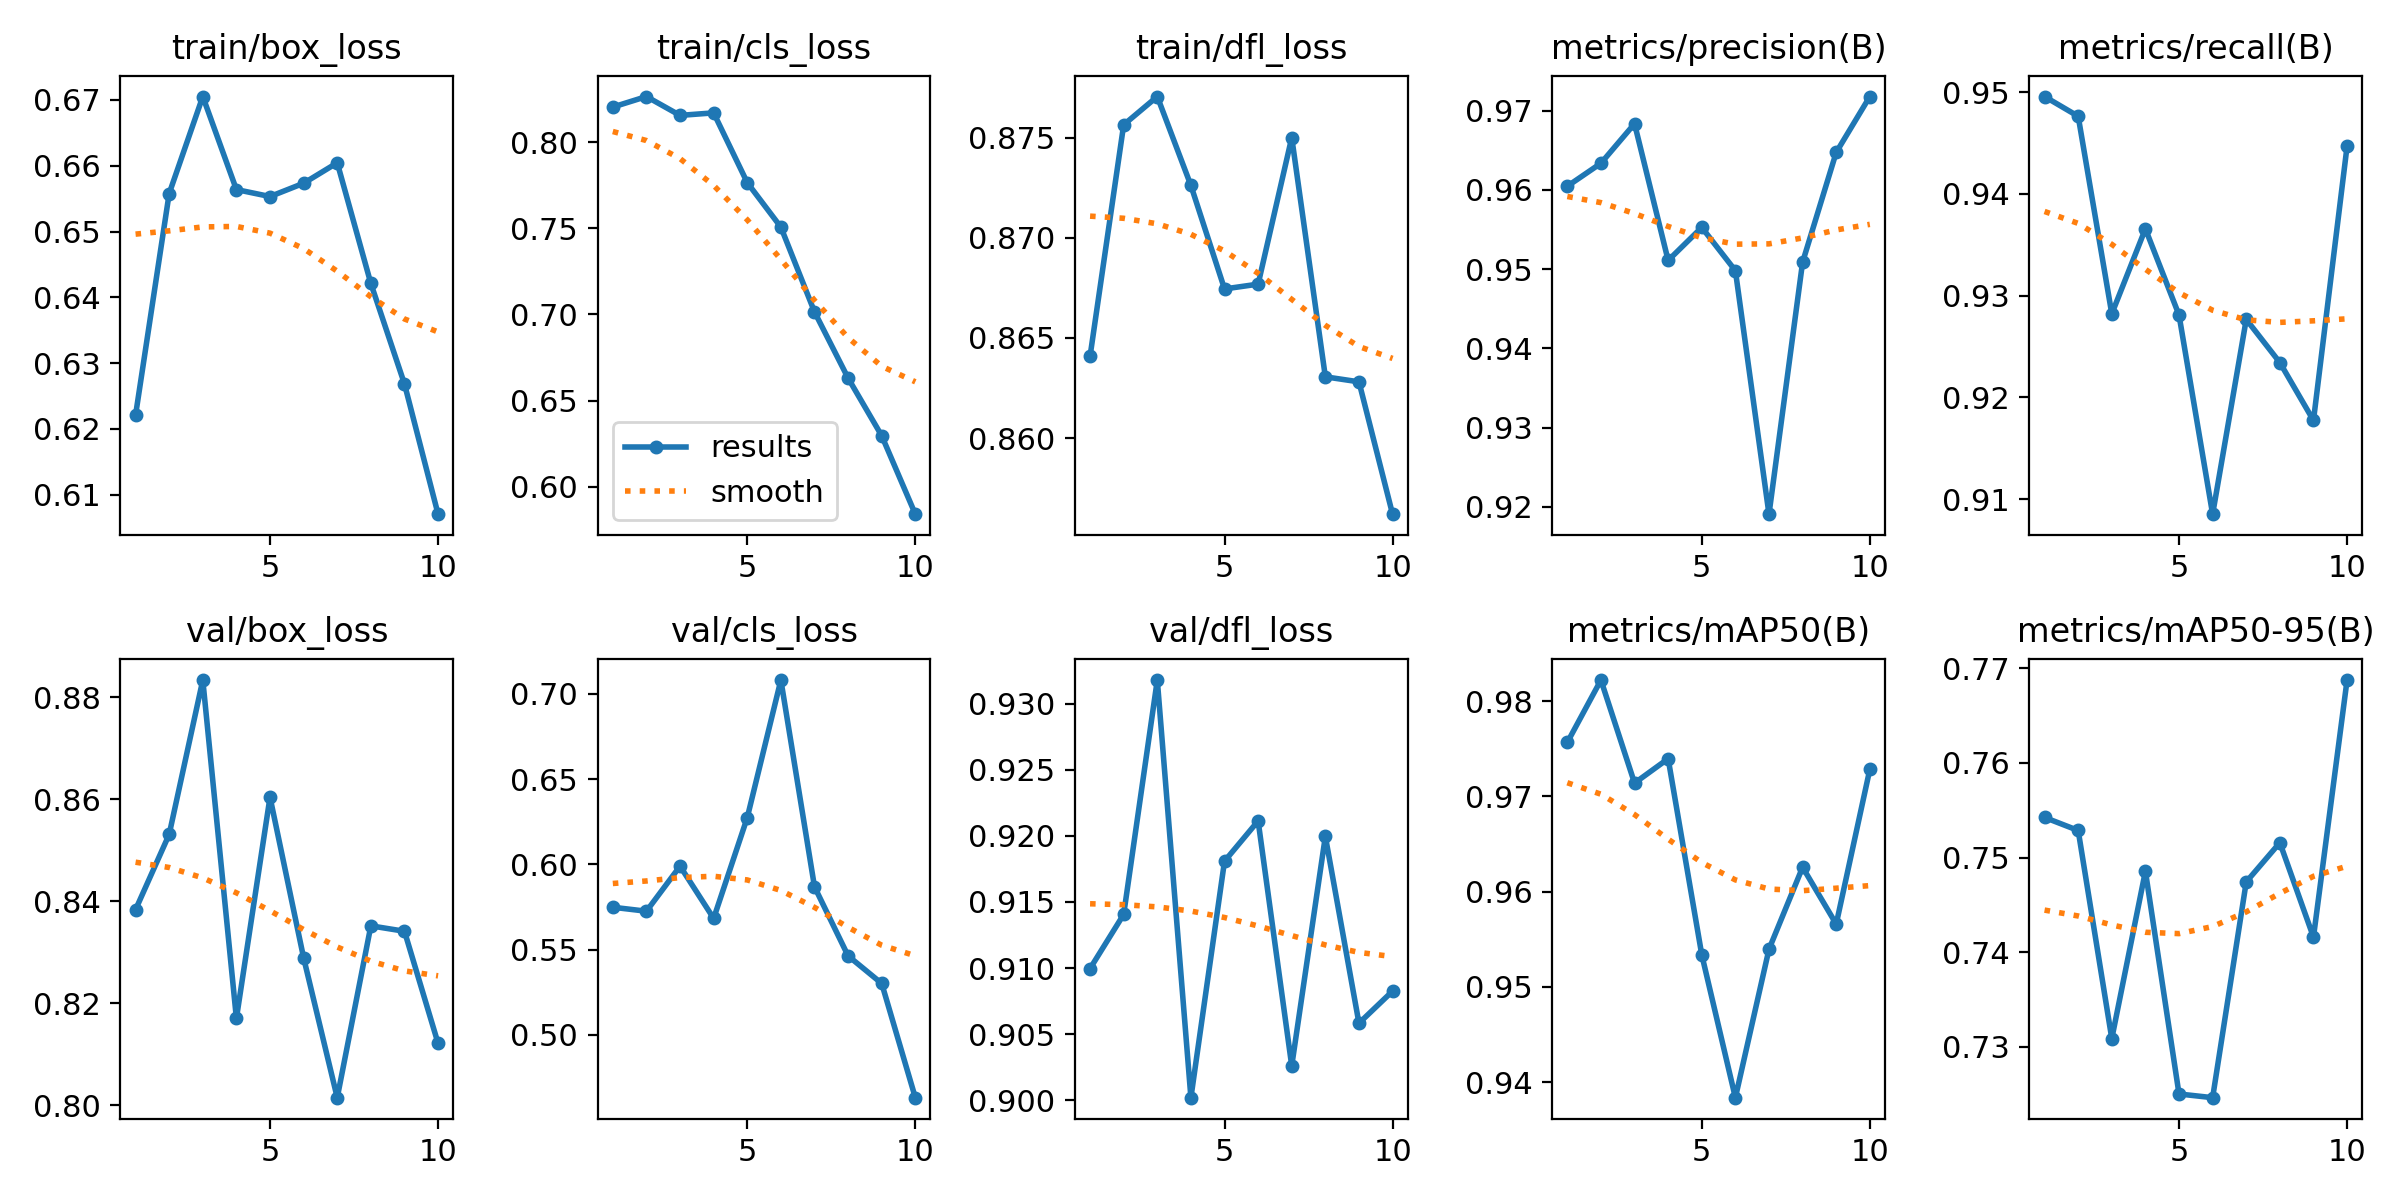

{'lr0': 0.0001, 'momentum': 0.9, 'weight_decay': 0.0005, 'warmup_epochs': 2.0}


,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
9,10,0.57318,0.44078,0.84546,0.97104,0.93915,0.97624,0.77174,0.80666,0.43882,0.9049,0.000156,0.000156,0.000156


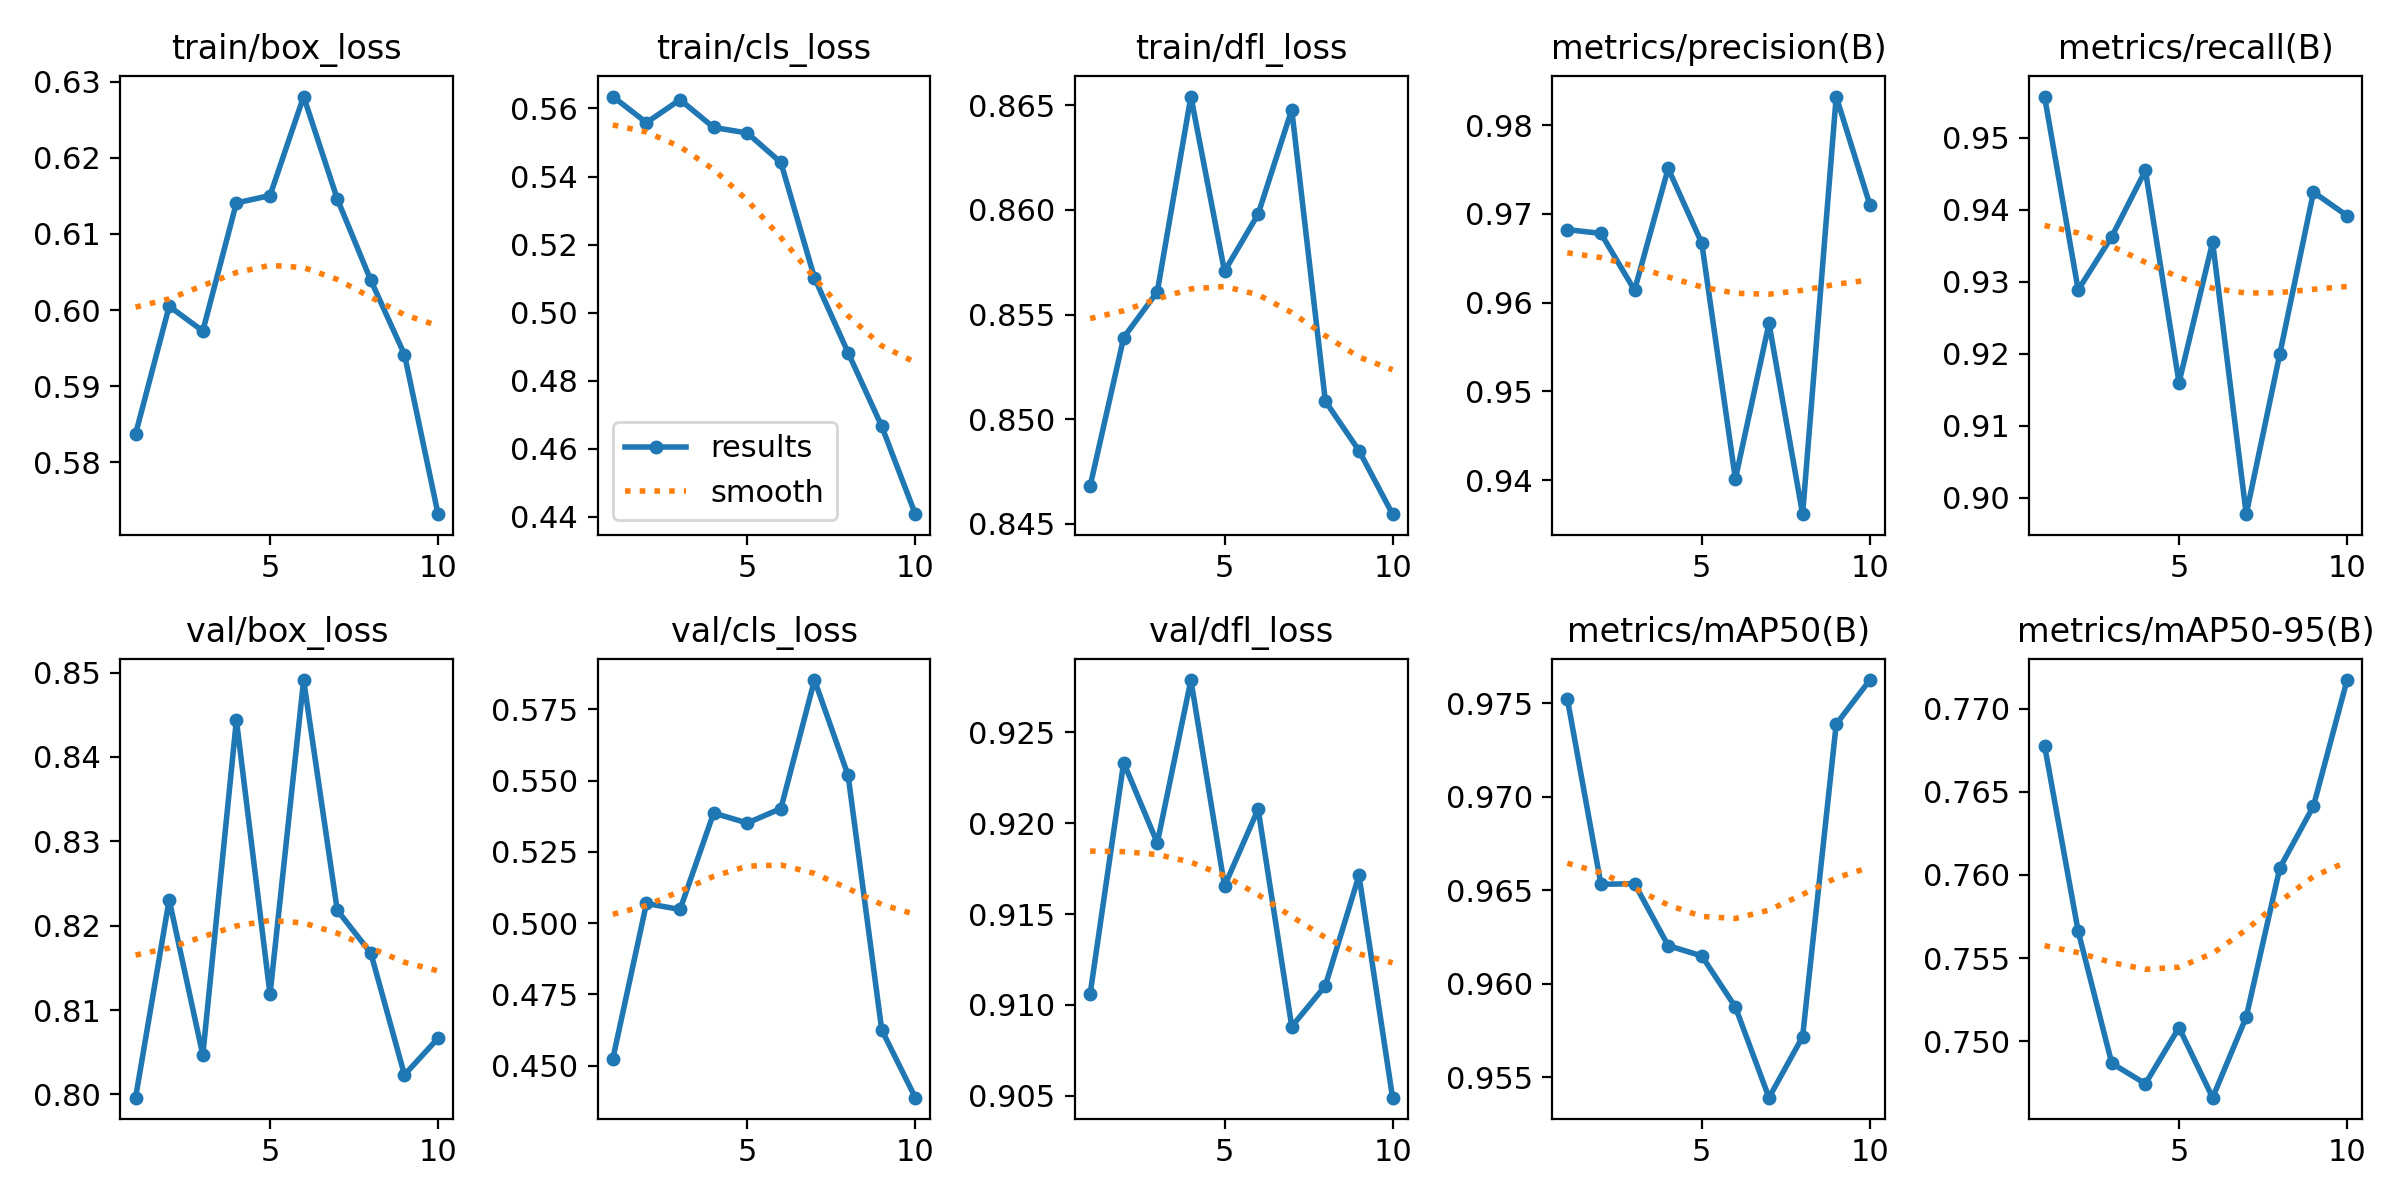

In [23]:
run_paths = ['/content/runs/detect/train3/', '/content/runs/detect/train32/', '/content/runs/detect/train322/']

from IPython.display import Image, display


for i, path in enumerate(run_paths):
    print(hyperparam_combinations[i])

    res = pd.read_csv(path + 'results.csv')
    display(res.tail(1))

    display(Image(path + 'results.png'))



Conclusion: 3rd combination is the best

In [28]:
!pip freeze > requirements.txt

In [27]:
model = YOLO("yolov8l.pt")

model.train(
        data=data,
        epochs=10,
        batch=-1,   # Auto adjust
        **hyperparam_combinations[2]
    )


100%|██████████| 83.7M/83.7M [00:00<00:00, 364MB/s]


Ultralytics YOLOv8.2.88 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/datasets/hagrid/data.yaml, epochs=10, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

train: Scanning /content/datasets/hagrid/train/labels.cache... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/hagrid/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.9' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.000546875), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      9.38G     0.9652       2.65      1.162          6        640: 100%|██████████| 72/72 [01:01<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.15s/it]

                   all        200        309    0.00116     0.0128   0.000152   4.24e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      9.32G      1.001      1.263      1.205          7        640: 100%|██████████| 72/72 [00:54<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.40it/s]

                   all        200        309      0.478     0.0633     0.0569     0.0359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      9.33G     0.9829      1.038      1.197          8        640: 100%|██████████| 72/72 [00:54<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]


                   all        200        309       0.72      0.553      0.622      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      9.44G     0.9303      0.836      1.166          8        640: 100%|██████████| 72/72 [00:55<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.63it/s]

                   all        200        309       0.86      0.798      0.844      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      9.32G     0.9009     0.7191      1.138          7        640: 100%|██████████| 72/72 [00:54<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.22it/s]

                   all        200        309      0.894      0.792      0.869      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      9.17G     0.8209     0.6345      1.081          7        640: 100%|██████████| 72/72 [00:58<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.40it/s]


                   all        200        309      0.915      0.808      0.869      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      9.34G       0.79     0.5629      1.056          9        640: 100%|██████████| 72/72 [00:53<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.29it/s]

                   all        200        309      0.938      0.858      0.908      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      9.32G     0.7263     0.4998      1.017          7        640: 100%|██████████| 72/72 [00:58<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]

                   all        200        309      0.952      0.867      0.922      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10       9.5G     0.6911     0.4453     0.9971          7        640: 100%|██████████| 72/72 [00:55<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.49it/s]

                   all        200        309      0.973      0.868      0.938      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      9.33G     0.6554     0.4088     0.9725          8        640: 100%|██████████| 72/72 [00:57<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.22it/s]

                   all        200        309      0.936      0.914      0.953      0.762



10 epochs completed in 0.194 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 87.6MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.88 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43,608,921 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.15s/it]


                   all        200        309      0.937      0.914      0.953      0.762
                  fist        100        100      0.963       0.99       0.99      0.795
                  palm        100        100      0.974          1      0.995       0.88
            no_gesture        109        109      0.873      0.752      0.873      0.611
Speed: 0.2ms preprocess, 14.1ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ace1fba64a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!cp -r /content/runs/detect/train4 /content/drive/MyDrive/handwave_model/runs